In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LogisticRegression
from matplotlib import rcParams

# Set font to Arial
rcParams['font.family'] = 'Arial'

# Define LeNet-5 model without dropout for color images
class SimpleLeNet5Color(nn.Module):
    def __init__(self):
        super(SimpleLeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)  # Adjust input size based on your image dimensions

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = x.view(-1, 6 * 14 * 14)  # Adjust the view size based on your image dimensions
        x = self.fc1(x)
        return x, conv1_output

# List to store activations for each model
all_conv1_activations = []
labels_list_all = [];
all_accuracies = [];

for n in range(10):
    # Load the pre-trained model
    model = SimpleLeNet5Color()
    model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))
    model.eval()

    # Define the transformation for the CIFAR-10 dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    # Load the CIFAR-10 dataset
    cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
    dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

    # Get the activations of the conv1 layer for the test set
    labels_list = []  # List to collect labels
    conv1_activations = None
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels_list.extend(labels)


    # Import necessary libraries
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # Example data: let's pretend we have some simple x and y
    # x is a single feature and y is the target variable
    X = conv1_activations.reshape(conv1_activations.shape[0], -1)
    y = labels_list

    X = X.numpy()
    
    # Standardize the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Calculate the squared sum of the eigenvalues
    squared_sum = np.sum(eigenvalues ** 2)
    
    # Calculate participation ratio
    participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)
    
    # Calculate effective dimensionality
    effective_dimensionality = participation_ratio
    
    all_accuracies.append(effective_dimensionality)
    
model2_accuracies = all_accuracies

Files already downloaded and verified


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x, conv1_output

# List to store activations for each model
all_conv1_activations = []
labels_list_all = [];
all_accuracies = [];

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model3_' + str(n) + '_9.pth'))
    model.eval()

    # Define the transformation for the CIFAR-10 dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    # Load the CIFAR-10 dataset
    cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
    dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

    # Get the activations of the conv1 layer for the test set
    labels_list = []  # List to collect labels
    conv1_activations = None
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels_list.extend(labels)


    # Import necessary libraries
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # Example data: let's pretend we have some simple x and y
    # x is a single feature and y is the target variable
    X = conv1_activations.reshape(conv1_activations.shape[0], -1)
    y = labels_list

    X = X.numpy()

    # Standardize the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Calculate the squared sum of the eigenvalues
    squared_sum = np.sum(eigenvalues ** 2)
    
    # Calculate participation ratio
    participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)
    
    # Calculate effective dimensionality
    effective_dimensionality = participation_ratio
    
    all_accuracies.append(effective_dimensionality)

model3_accuracies = all_accuracies

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        #x = self.fc3(x)
        return x, conv1_output

# List to store activations for each model
all_conv1_activations = []
labels_list_all = [];
all_accuracies = [];

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model4_' + str(n) + '_9.pth'))
    model.eval()

    # Define the transformation for the CIFAR-10 dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    # Load the CIFAR-10 dataset
    cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
    dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

    # Get the activations of the conv1 layer for the test set
    labels_list = []  # List to collect labels
    conv1_activations = None
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels_list.extend(labels)


    # Import necessary libraries
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # Example data: let's pretend we have some simple x and y
    # x is a single feature and y is the target variable
    X = conv1_activations.reshape(conv1_activations.shape[0], -1)
    y = labels_list

    X = X.numpy()

    # Standardize the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Calculate the squared sum of the eigenvalues
    squared_sum = np.sum(eigenvalues ** 2)
    
    # Calculate participation ratio
    participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)
    
    # Calculate effective dimensionality
    effective_dimensionality = participation_ratio
    
    all_accuracies.append(effective_dimensionality)

model4_accuracies = all_accuracies

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x, conv1_output

# List to store activations for each model
all_conv1_activations = []
labels_list_all = [];
all_accuracies = [];

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
    model.eval()

    # Define the transformation for the CIFAR-10 dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    # Load the CIFAR-10 dataset
    cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
    dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

    # Get the activations of the conv1 layer for the test set
    labels_list = []  # List to collect labels
    conv1_activations = None
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels_list.extend(labels)


    # Import necessary libraries
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # Example data: let's pretend we have some simple x and y
    # x is a single feature and y is the target variable
    X = conv1_activations.reshape(conv1_activations.shape[0], -1)
    y = labels_list
    
    X = X.numpy()

    # Standardize the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Calculate the squared sum of the eigenvalues
    squared_sum = np.sum(eigenvalues ** 2)
    
    # Calculate participation ratio
    participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)
    
    # Calculate effective dimensionality
    effective_dimensionality = participation_ratio
    
    all_accuracies.append(effective_dimensionality)

model5_accuracies = all_accuracies

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


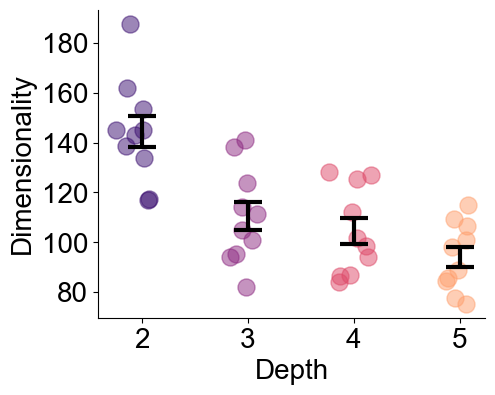

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns

rainbow = sns.color_palette("magma", 4)
fig, ax = plt.subplots(figsize=(5, 4))

# Example model accuracy arrays (replace with your actual arrays)
# model2_accuracies = np.random.rand(50)  # Replace with actual data
# model3_accuracies = np.random.rand(50)
# model4_accuracies = np.random.rand(50)
# model5_accuracies = np.random.rand(50)

# Create a list of tuples for each depth group: (data, x_position, color)
depth_data = [
    (model2_accuracies, 2, rainbow[0]),
    (model3_accuracies, 3, rainbow[1]),
    (model4_accuracies, 4, rainbow[2]),
    (model5_accuracies, 5, rainbow[3]),
]

# Loop over each depth group to plot individual points and error bars
for data, depth, color in depth_data:
    # Scatter plot individual points with jitter
    jitter = 0.1 * np.random.randn(len(data)) + depth
    ax.scatter(jitter, data, alpha=0.5, color=color, s=150)
    
    # Compute mean and SEM for this group
    mean_val = np.mean(data)
    sem_val = np.std(data) / np.sqrt(len(data))
    
    # Plot a big error bar for the mean and SEM
    ax.errorbar(depth, mean_val, yerr=sem_val, fmt='|', markersize=12,
                color='black', ecolor='black', elinewidth=3, capsize=10, capthick=3)

ax.set_xlabel('Depth', fontname="Arial", fontsize=20)
ax.set_ylabel('Dimensionality', fontname="Arial", fontsize=20)
ax.set_title('', fontname="Arial", fontsize=25, fontweight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(range(2, 6))

# Set the font name for axis tick labels to be Arial
for tick in ax.get_xticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)

plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
import pandas as pd

# Assign accuracy data
kurtosis_2_layers = model2_accuracies
kurtosis_3_layers = model3_accuracies
kurtosis_4_layers = model4_accuracies
kurtosis_5_layers = model5_accuracies

# Perform ANOVA
anova_result = f_oneway(kurtosis_2_layers, kurtosis_3_layers, kurtosis_4_layers, kurtosis_5_layers)

# Calculate degrees of freedom
k = 4  # number of groups
n_total = (
    len(kurtosis_2_layers) +
    len(kurtosis_3_layers) +
    len(kurtosis_4_layers) +
    len(kurtosis_5_layers)
)
df_between = k - 1
df_within = n_total - k

# Print ANOVA result
print(f'ANOVA result: F({df_between}, {df_within}) = {anova_result.statistic:.4f}, p = {anova_result.pvalue:.4e}')

# Pairwise t-tests with Bonferroni correction
comparisons = [
    ("2 vs 3", kurtosis_2_layers, kurtosis_3_layers),
    ("2 vs 4", kurtosis_2_layers, kurtosis_4_layers),
    ("2 vs 5", kurtosis_2_layers, kurtosis_5_layers),
]

for label, group1, group2 in comparisons:
    t_stat, p_val = ttest_ind(group1, group2)
    p_val_corrected = p_val * len(comparisons)
    df_t = len(group1) + len(group2) - 2
    print(f'T-test {label}: t({df_t}) = {t_stat:.4f}, p (Bonferroni corrected) = {p_val_corrected:.4e}')

ANOVA result: F(3, 36) = 14.5355, p = 2.3111e-06
T-test 2 vs 3: t(18) = 3.7702, p (Bonferroni corrected) = 4.2046e-03
T-test 2 vs 4: t(18) = 4.6324, p (Bonferroni corrected) = 6.2088e-04
T-test 2 vs 5: t(18) = 6.3660, p (Bonferroni corrected) = 1.6117e-05
